# Introduction

Le but de ce TP Python est d'observer, via un calcul numérique, l'étalement d'un paquet d'onde au cours de sa propagation.

Pour rappel, un paquet d'onde $\underline{u}$ est une représentation mathématique d'une onde réelle sous la forme d'une somme continue d'OPPH de pulsations voisines.

$$ \underline{u} = \int \text{d} \omega\,  \underline{u}_\omega\, \text{e}^{\text{j}\, (\omega\, t - \underline{k}\, x)} $$

Étant une onde, $\underline{u}$ vérifie une équation d'onde (qu'on n'est pas obligé de préciser ici, ce qu'on discute dans la suite se veut très général et concerne toutes les équations d'ondes linéaires). Par suite, le vecteur d'onde $\underline{k}$ et la pulsation $\omega$ sont reliés par une **relation de dispersion**

$$ \underline{k} = f(\omega) $$

avec $f$ à préciser, qui est équivalente à l'équation d'onde.

On rappelle que la partie imaginaire contient l'information sur l'**absorption** du paquet d'onde, et la partie réelle celle sur la **dispersion**. Dans ce TP, on suppose qu'il n'y a pas d'absorption, donc $\underline{k}$ est purement réèl. On note $\underline{k} = k' \equiv k$ dans la suite.

# Principe du TP

On considère un paquet d'onde, et on regarde sa propagation. Il nous faut pour cela préciser le **paquet d'onde** $\underline{u}$ d'une part, et la **relation de dispersion** d'autre part. 

## Paquet d'onde

La forme du paquet d'onde est sans importance, je vous propose de considérer une densité spectrale de forme gaussienne (c'est standard)

$$ \underline{u}_\omega = u_0\, \text{e}^{-(\omega - \omega_0)^2\, /\, ({\Delta \omega}^2) } $$

de pulsation moyenne $\omega_0$ et de largeur spectrale $\Delta \omega$.

Choisissons $\Delta \omega = \omega_0 / 10$ pour l'exemple, et traçons ce paquet d'onde avec Python. Pour cela, on considère seulement des valeurs discrètes de $\omega$, disons $N=200$ valeurs entre $\omega-2,\!5\, \Delta\omega$ et $\omega+2,\!5\, \Delta\omega$ (largeur totale $5 \Delta \omega)$, 

$$ \omega_i = \omega_0 - 2,\!5\, \Delta \omega + i \frac{5\, \Delta \omega}{N} $$

et on approxime la somme continue par une somme discrète pour l'écrire facilement en Python :

$$ \underline{u} = \int \text{d} \omega\,  \underline{u}_\omega\, \text{e}^{\text{j}\, (\omega\, t - \underline{k}\, x)} \approx 
\sum_{i=0}^{N} \underline{u}_{\omega_i}\, \text{e}^{\text{j}\, (\omega_i\, t - k_i\, x)} $$

Puisqu'on a précisé $\underline{u}_\omega$, on peut écrire ici

$$ \underline{u} = \sum_{i=0}^{N} u_0\, \text{e}^{-(\omega_i - \omega_0)^2\, /\, ({\Delta \omega}^2) }\, \text{e}^{\text{j}\, (\omega_i\, t - k_i\, x)}$$

et nous revenons à l'onde réelle à partir de maintenant : 

$$u = \sum_{i=0}^{N} u_0\, \text{e}^{-(\omega_i - \omega_0)^2\, /\, ({\Delta \omega}^2) }\, \cos(\omega_i\, t - k(\omega_i)\, x) $$

C'est le paquet d'onde que nous utiliserons dans ce TP numérique. 

## Relation de dispersion

On choisit pour ce TP une relation de dispersion simple (sans système physique précis en tête):

$$ k(\omega) = \frac{\omega}{c}\, \Big(1 + \frac{\omega - \omega_0}{2\, \omega_0} \Big) $$

La vitesse de phase $v_\varphi$ vaut alors

$$v_\varphi(\omega) = \frac{\omega}{k} = \frac{c}{1 + \frac{\omega - \omega_0}{2\, \omega_0} } $$

Puisqu'elle dépend de $\omega$, les différentes OPPH du paquet d'onde ne voyagent pas à la même vitesse et le paquet d'onde se déforme au cours de la propagation.

**Q. Calculer la vitesse de groupe.**


# Implémentation en Python

Traçons pour commencer le paquet d'onde . Pour cela on commence par tracer la densité spectrale (juste pour voir à quoi notre choix gaussien ressemble).

1. On charge les bibliothèques.

In [250]:
import numpy as np
from matplotlib import pyplot as plt

2. On définit les valeurs d'intérêt.

In [251]:
f0 = 1e9
w0 = 2 * np.pi * f0
Dw = w0 / 10
N = 200
u0 = 1

3. Puis les différentes pulsations des OPPH qu'on utilise sous forme de tableau.

In [252]:
w = [ w0 - 2.5 * Dw + i * 5 * Dw / N for i in range(N) ]

4. En enfin la densité spectrale pour chacune de ces pulsations.

In [253]:
uw = [ u0 * np.exp(- ( w[i] - w0 )**2 / Dw**2 ) for i in range(N) ]

5. Puis on trace pour vérifier que tout va bien avec les différentes grandeurs.

Text(0, 0.5, 'Densite spectrale')

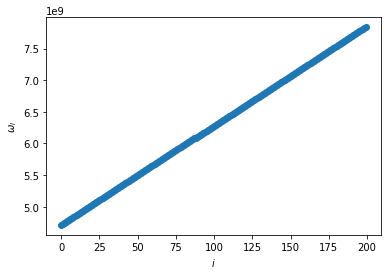

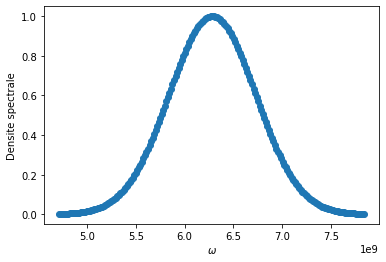

In [254]:
plt.figure(1)
plt.plot(w, 'o')
plt.xlabel('$i$')
plt.ylabel('$\omega_i$')

plt.figure(2)
plt.plot(w, uw, 'o')
plt.xlabel('$\omega$')
plt.ylabel('Densite spectrale')

Ensuite, on définit la relation de dispersion en écrivant les différents vecteurs d'onde dans un tableau. On rappelle

$$ k(\omega) = \frac{\omega}{c}\, \Big(1 + \frac{\omega - \omega_0}{2\, \omega_0} \Big) $$

In [266]:
c = 2e8

f = lambda x : x / c * (1 + (x-w0) / (2*w0) )

k = [ f(w[i]) for i in range(N) ]

Traçons alors cette relation de dispersion.

Text(0, 0.5, '$k$')

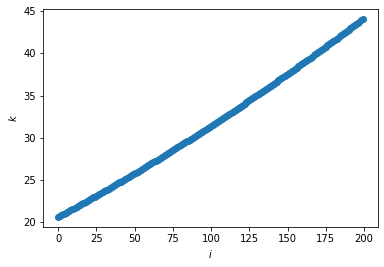

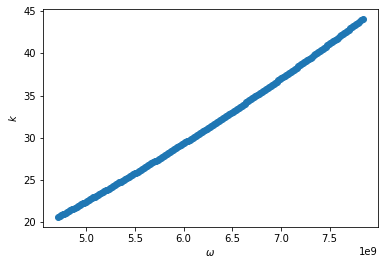

In [267]:
plt.figure(3)
plt.plot(k, 'o')
plt.xlabel('$i$')
plt.ylabel('$k$')

plt.figure(4)
plt.plot(w, k, 'o')
plt.xlabel('$\omega$')
plt.ylabel('$k$')

Puis on trace le paquet d'onde, en définissant les OPPH dans un tableau (de fonctions!) puis en disant que le paquet d'onde est la somme des OPPH.

In [268]:
OPPH = [ lambda x, t, j=i : uw[j] * np.cos( w[j] * t - k[j] * x ) for i in range(N) ]

u = lambda x, t : sum( OPPH[i](x, t) for i in range(N) )

Il ne reste alors qu'à tracer le paquet d'onde à $t=0$.

(-70.0, 70.0)

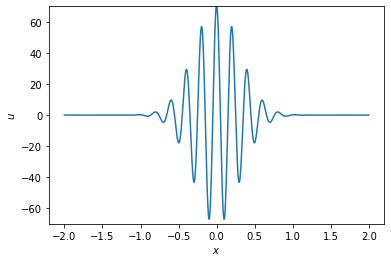

In [269]:
x = np.linspace(-2,2,2000)
t = 0

plt.figure(5)
plt.plot(x, u(x, t))
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.ylim(-70,70)

Et en dézoomant, pour plusieurs instants $t$.

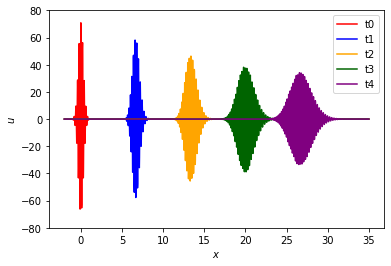

In [270]:
Nfig = 5
coul = ['r', 'b', 'orange', 'darkgreen', 'purple']

t = [50 * i * 1e-9 for i in range(5)]

x = np.linspace(-2,35,2000)

plt.figure(8)

for i in range(5) :
  plt.plot(x, u(x, t[i]), color=coul[i], label='t'+str(i))

plt.xlabel('$x$')
plt.ylabel('$u$')
plt.ylim(-80,80)
plt.legend(loc=1)

On observe que le paquet d'onde s'étale au fur et à mesure de la propagation.